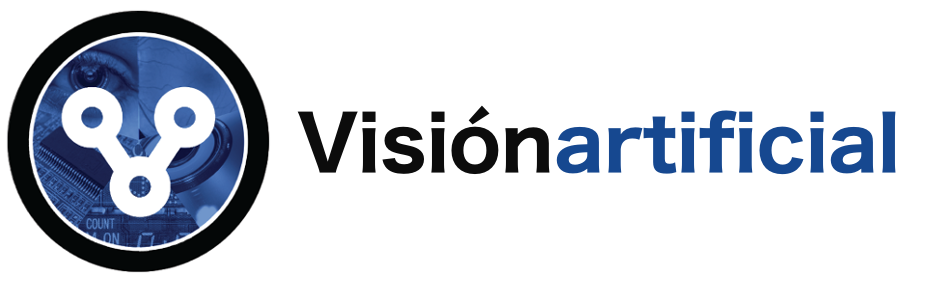

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Descriptor baseado en Histogramas de Gradientes Orientados (HOG)</font>

Histogramas de Gradientes Orientados (HOG) son descritores usados **principalmente en visión artificial e aprendizaxe automática para a detección de obxectos**. Non obstante, tamén podemos usalos para cuantificar e representar tanto a forma como a textura.

As funcións HOG foron introducidas por primeira vez por Dalal e Triggs no seu artigo CVPR 2005, [Histogram of Oriented Gradients for Human Detection](./artigos/dalal_2005.pdf). Dalal e Triggs propuxeron HOG e un descritor de 5 etapas para clasificar humanos en imaxes fixas.

As 5 etapas inclúen:

- Normalización da imaxe antes da descrición.
- Cálculo de gradientes nas direccións x e y.
- Obtención de votos ponderados en celas espaciais e de orientación.
- Contraste que normaliza as células espaciais superpostas.
- Concatenación de todos os histogramas de gradientes orientados para formar o vector de características final.

Os parámetros máis importantes para o descritor HOG son: orientations, pixels_per_cell e the cells_per_block. Estes tres parámetros (xunto co tamaño da imaxe de entrada) controlan efectivamente a dimensionalidade do vector de características resultante. Revisaremos estes parámetros e as súas implicacións máis adiante neste caderno.

Na maioría das aplicacións reais, HOG úsase xunto cun **SVM lineal** para realizar a detección de obxectos. A razón pola que HOG se utiliza tan intensamente é porque a aparencia e a forma do obxecto local poden caracterizarse mediante a distribución dos gradientes de intensidade local. De feito, estes son exactamente os mesmos gradientes de imaxe que vimos no temas dos bordes, pero só que agora imos tomar estes gradientes de imaxe e convertelos nun descriptor de imaxe robusto e potente.

HOG está implementado tanto en OpenCV como en scikit-image. A implementación de OpenCV é menos flexible que a implementación de scikit-image, polo que usaremos principalmente a implementación de **scikit-image** neste caderno.


## <font style="color:rgb(50,120,229)">Obxectivos</font>

Neste caderno ocuparemonos do descritor HoG.
     
     
## <font style="color:rgb(50,120,229)">Para que se empregan os descritores HoG?</font>  

Os descritores HOG utilízanse para describir a forma estrutural e o aspecto dun obxecto nunha imaxe, polo que son excelentes para a clasificación de obxectos. Non obstante, dado que HOG captura gradientes de intensidade locais e direccións dos bordes, tamén é un bo descritor de texturas.

O descritor HOG devolve un vector de características reais. A dimensionalidade deste vector de características depende dos parámetros escollidos e mensionados anteriormente: orientations, pixels_per_cell e cells_per_block.


## <font style="color:rgb(50,120,229)">Como funcionan os descriptores HOG?</font>   

A pedra angular do algoritmo HOG é que a aparencia dun obxecto pode modelarse pola distribución de gradientes de intensidade dentro das rexións rectangulares dunha imaxe.

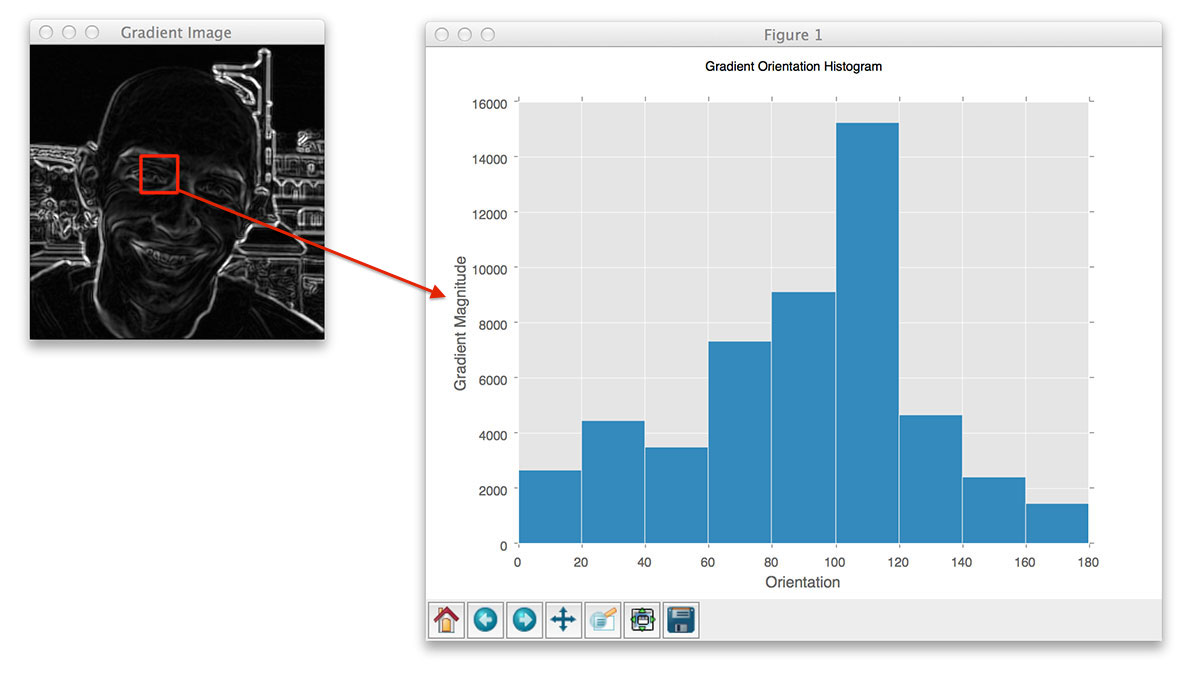
Implementar este descritor require dividir a imaxe en pequenas rexións conectadas chamadas celas, e despois para cada cela, calcular un histograma de gradientes orientados para os píxeles dentro de cada unha. Despois podemos acumular estes histogramas en varias celas para formar o noso vector de características.

Dalal e Triggs tamén demostraron que podemos realizar unha normalización de bloques para mellorar o rendemento. Para realizar a normalización de bloques tomamos grupos de celas superpostas, concatenamos os seus histogramas, calculamos un valor normalizador e, a continuación, normalizamos o histograma. Ao normalizarse sobre varios bloques superpostos, o descritor resultante é máis robusto ante os cambios de iluminación e sombreado. Ademais, realizar este tipo de normalización implica que cada unha das celas estará representada no vector de características final varias veces pero normalizada por un conxunto **lixeiramente diferente** de celas veciñas.

Agora, repasemos cada un dos pasos para calcular o descritor HOG.

### Paso 1: Normalización da imaxe antes da descrición.

Este paso de normalización é totalmente opcional, pero nalgúns casos este paso pode mellorar o rendemento do descritor HOG. Hai tres métodos principais de normalización que podemos considerar:

- Normalización da lei gamma/potencia: neste caso, tomamos o $\log(p)$ de cada píxel $p$ na imaxe de entrada. Non obstante, como demostraron Dalal e Triggs, este enfoque quizais sexa unha "corrección excesiva" e prexudica o rendemento.
- Normalización de raíz cadrada: aquí tomamos a $\sqrt(p)$ de cada píxel $p$ na imaxe de entrada. Por definición, a normalización de raíz cadrada comprime as intensidades dos píxeles de entrada moito menos que a normalización gamma. E de novo, como demostraron Dalal e Triggs, a normalización da raíz cadrada realmente aumenta a precisión en lugar de prexudicala.
- Normalización da varianza: unha forma de normalización un pouco menos utilizada é a normalización da varianza. Aquí, calculamos tanto a media $\mu$ como a desviación estándar $\sigma$ da imaxe de entrada. Todos os píxeles céntranse como media restando a media da intensidade dos píxeles, e despois normalízanse dividindo pola desviación estándar: $p' = (p - \mu) / \sigma$. Dalal e Triggs non informan de precisión desta normalización da varianza pero é unha normalización que paga a pena incluír.

Na maioría dos casos, é mellor comezar sen normalización ou normalización de raíz cadrada e logo probar variantes propostas.

### Paso 2: cálculo do gradiente

O primeiro paso real no descritor HOG é calcular o gradiente da imaxe tanto na dirección x como na dirección y. Aplicaremos unha operación de convolución para obter as imaxes de gradiente:
$G_{x} = I \star D_{x} e G_{y} = I \star D_{y}$
onde $I$ é a imaxe de entrada, $D_{x}$ é o noso filtro na dirección x e $D_{y}$ é o noso filtro na dirección y.

Para completar, aquí tes un exemplo de cálculo do gradiente x e y dunha imaxe de entrada:


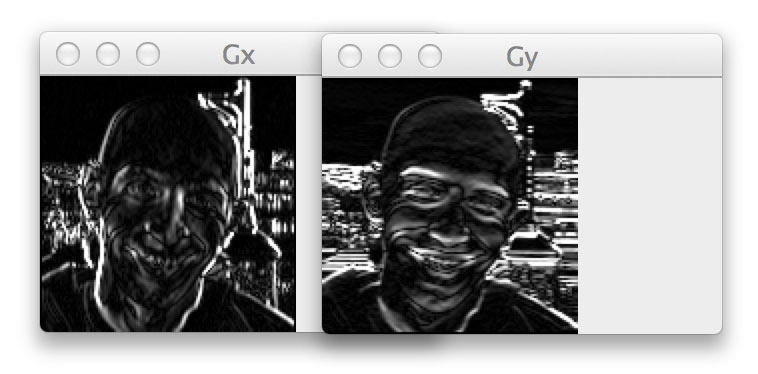
Agora que temos as nosas imaxes de gradiente, podemos calcular a representación final da magnitude do gradiente da imaxe:
$|G| = \sqrt{G_{x}^{2} + G_{y}^{2}}$

Finalmente, a orientación do gradiente para cada píxel da imaxe de entrada pódese calcular mediante:
$\theta = arctan2(G_{y}, G_{x})$

Dados os dous $|G|$ e $\theta$, agora podemos calcular un histograma de gradientes orientados, onde o bin do histograma está baseado en $\theta$ e a contribución ou peso engadido a un determinado bin do histograma está baseado en $|G|$.

### Paso 3: Votos ponderados en cada cela

Agora que temos as nosas representacións de orientación e magnitude do gradiente, necesitamos dividir a nosa imaxe en celas e bloques.

Unha "célula" é unha rexión rectangular definida polo número de píxeles que pertencen a cada cela. Por exemplo, se tivésemos unha imaxe de 128 x 128 e definimos o noso pixels_per_cell como 4 x 4, teríamos 32 x 32 = 1024 celas:
   


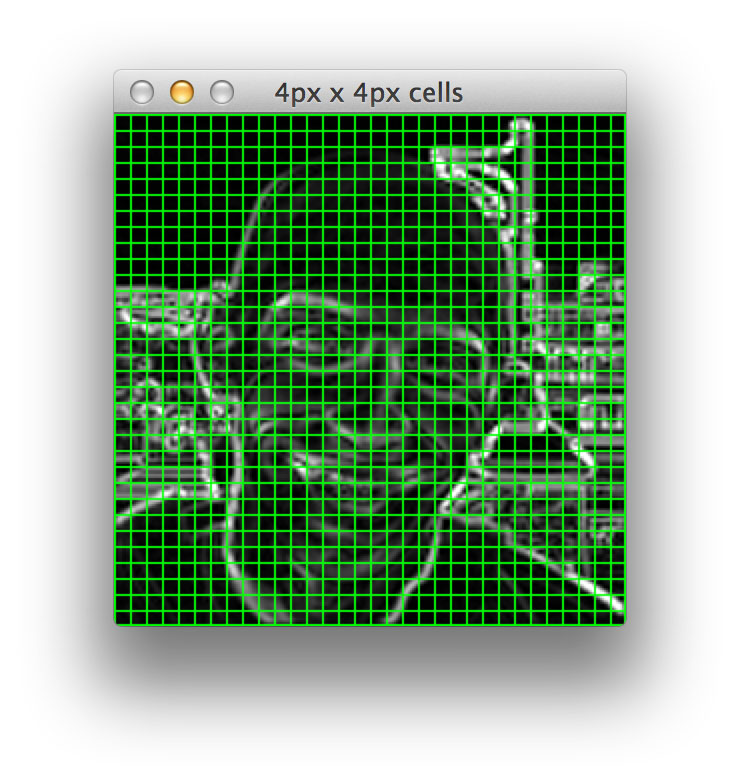

Agora, para cada unha das celas da imaxe, necesitamos construír un histograma de gradientes orientados usando a nosa magnitude de gradiente $|G|$ e orientación $\theta$ mencionada anteriormente.

Pero antes de construír este histograma, necesitamos definir o noso número de **orientation**. O número de orientacións controla o número de bins no histograma resultante. O ángulo do gradiente está dentro do intervalo $[0, 180]$ (sen signo) ou $[0, 360]$ (con signo). En xeral, é preferible usar gradientes sen signo no intervalo $[0, 180]$ co número de orientacións nalgún lugar do intervalo $[9, 12]$. Pero dependendo da túa aplicación, usar gradientes con signo pode mellorar a precisión.

Finalmente, cada píxel aporta un voto ponderado ao histograma: o peso do voto é simplemente a magnitude do gradiente |G| no píxel dado.

Deixemos isto máis claro botando unha ollada á nosa imaxe de exemplo dividida en celas de 16 x 16 píxeles:


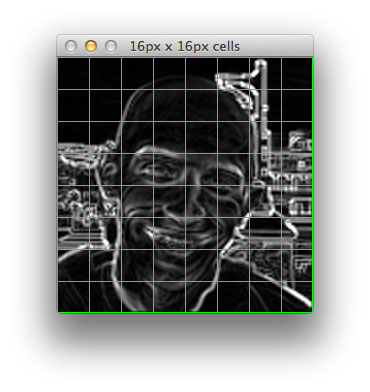
E despois para cada unha destas celas, imos calcular un histograma de gradientes orientados usando 9 orientacións (ou bins) por histograma:

Un exemplo de histograma de gradientes usando as orientacións como contedores:

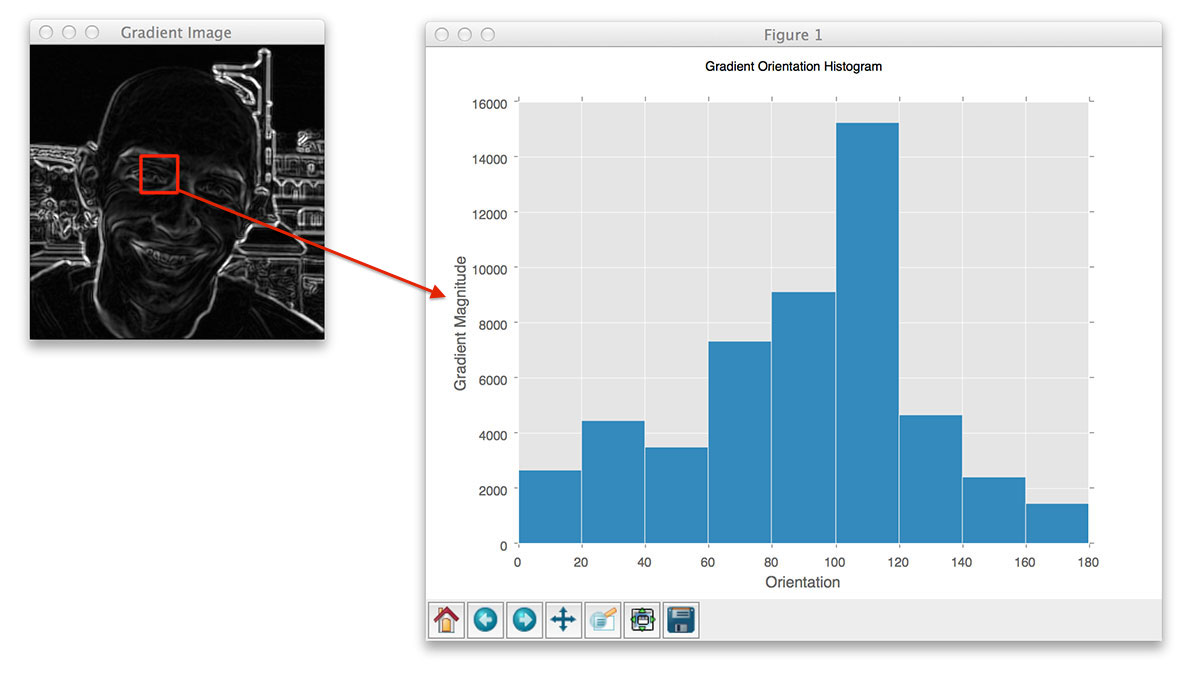
Aquí tes unha animación na que podemos ver visualmente un histograma diferente calculado para cada unha das celas:


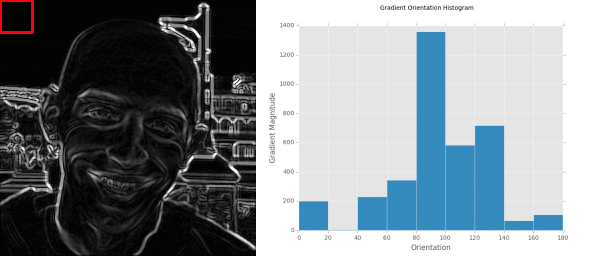
Neste punto, poderiamos recoller e concatenar cada un destes histogramas para formar o noso vector de características final. Non obstante, é beneficioso aplicar a normalización de bloques, que revisaremos na seguinte sección.

### Paso 4: contraste a normalización sobre os bloques

Para ter en conta os cambios na iluminación e o contraste, podemos normalizar os valores do gradiente localmente. Isto require agrupar as "células" en "bloques" de conexión máis grandes. É común que estes bloques se solapen, o que significa que cada cela contribúe ao vector de características final máis dunha vez.

De novo, o número de bloques é rectangular. Agora, as nosas unidades xa non son píxeles, son as celas. Dalal e Triggs informan que o uso de $2 x 2$ ou $3 x 3$ celas_por_bloque obteñen unha precisión razoable na maioría dos casos.

Aquí tes un exemplo onde tomamos unha rexión de entrada dunha imaxe, calculamos un histograma de gradiente para cada cela e despois agrupamos localmente as celas en bloques superpostos:

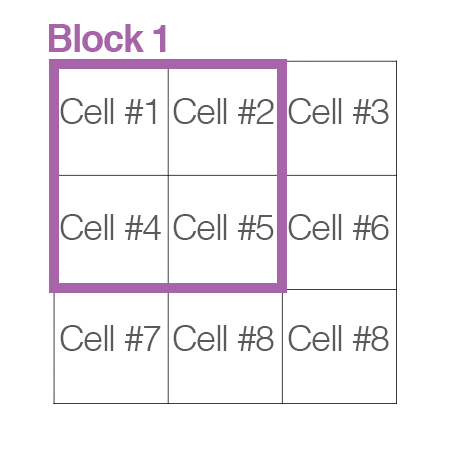

Para cada unha das celas do bloque actual concatenamos os seus correspondentes histogramas de gradiente, seguidos dunha normalización L1 ou L2 para todo o vector de características concatenadas. De novo, realizar este tipo de normalización implica que cada unha das celas estará representada no vector de características final varias veces pero normalizada por un valor diferente. Aínda que esta representación múltiple é redundante e desperdicia espazo, en realidade aumenta o rendemento do descritor.

Finalmente, despois de que todos os bloques estean normalizados, tomamos os histogramas resultantes, os concatenamos e os tratamos como o noso vector de características final.

## <font style="color:rgb(50,120,229)">Onde están implementados os descritores HOG?</font>

Os descritores HOG están implementados dentro da biblioteca OpenCV e scikit-image. Non obstante, a implementación de OpenCV non é moi flexible e está orientada principalmente á implementación de Dalal e Triggs. A implementación de scikit-image é moito máis flexible, polo que utilizaremos principalmente a implementación de scikit-image.

## <font style="color:rgb(50,120,229)">Identificación de logotipos de coches mediante descriptores HOG</font>

No resto desta caderno, ilustrase como podemos usar o descritor HoG para caracterizar os logotipos das marcas de coches. Do mesmo xeito que na lección de texturas Haralick, aproveitaremos un pouco de aprendizaxe automática para axudarnos na clasificación.

Pero antes de afondar neste proxecto, vexamos o noso conxunto de datos.

### Conxunto de datos

O noso conxunto de datos de logotipos de coches consta de cinco marcas de vehículos: Audi, Ford, Honda, Subaru e Volkswagen.

Para cada unha destas marcas, hai cinco imaxes baixadas da web:


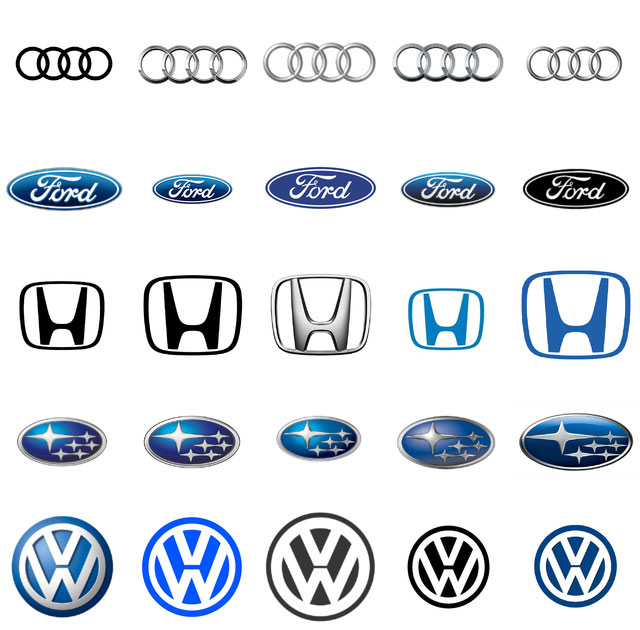


As iamxes test son sete fotos dos logotipos dos coches reais:


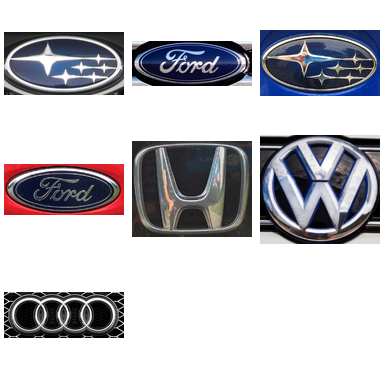

### O noso obxectivo

O obxectivo deste proxecto é:

- Extraer as funcións HOG do noso conxunto de adestramento para caracterizar e cuantificar o logotipo de cada coche.
- Adestrar un clasificador de aprendizaxe automática para distinguir o logotipo de cada coche.
- Aplicar un clasificador para recoñecer logos de coches con imaxes test.

Imos alo!

[INFO] extraendo as caracteristicas...
[INFO] entrenando o clasificador...
[INFO] evaluando...


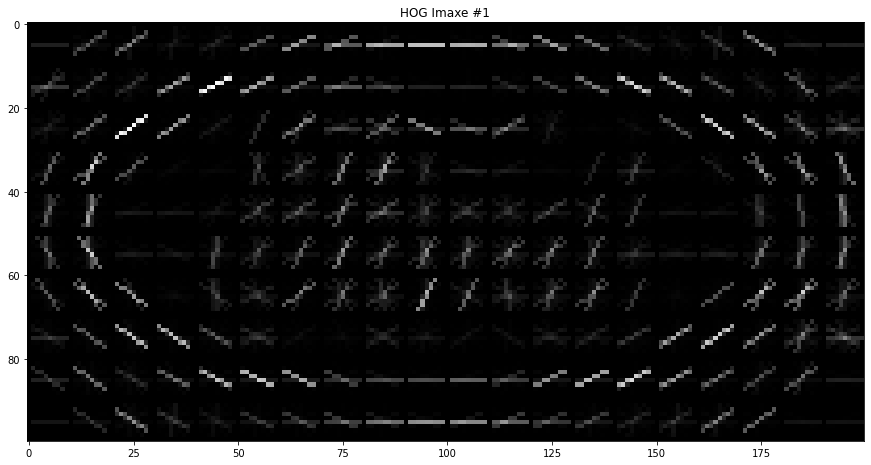

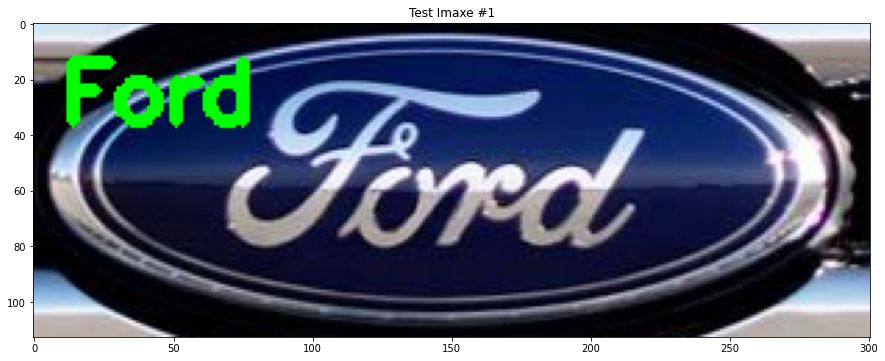

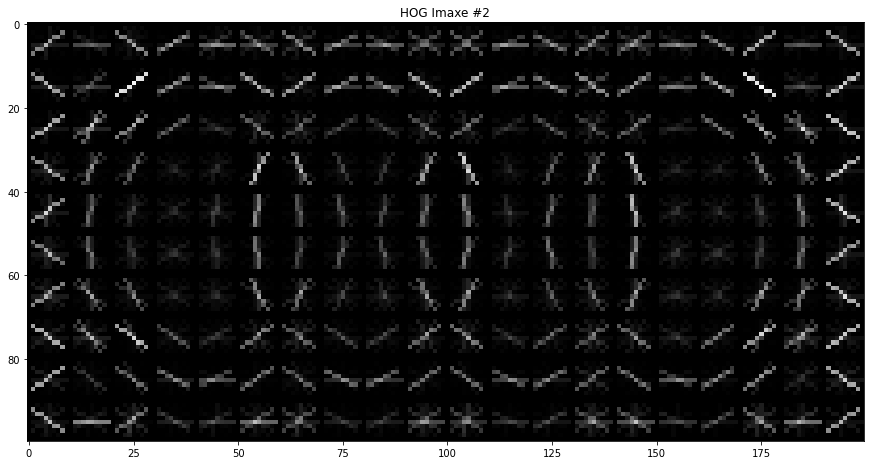

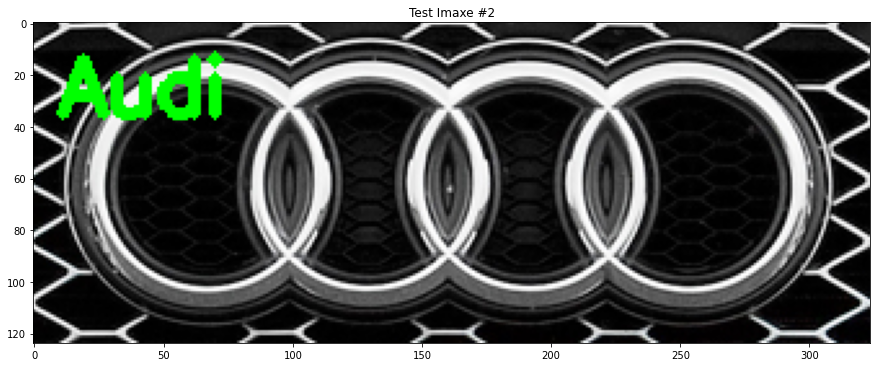

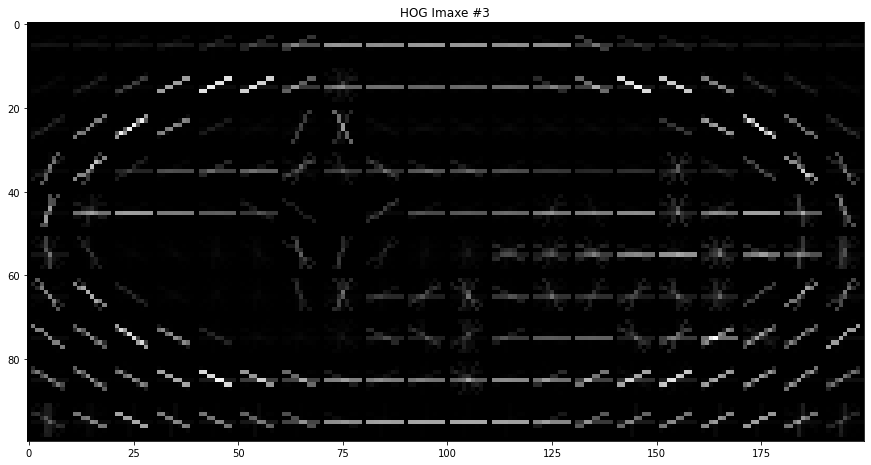

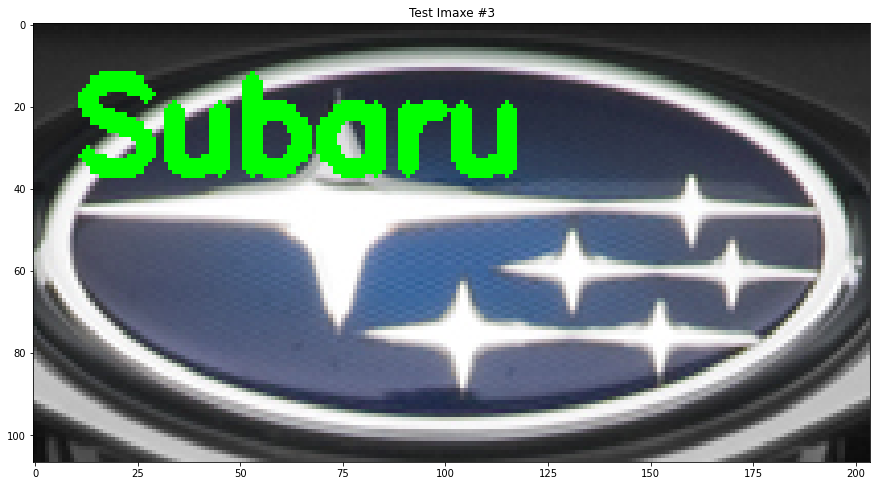

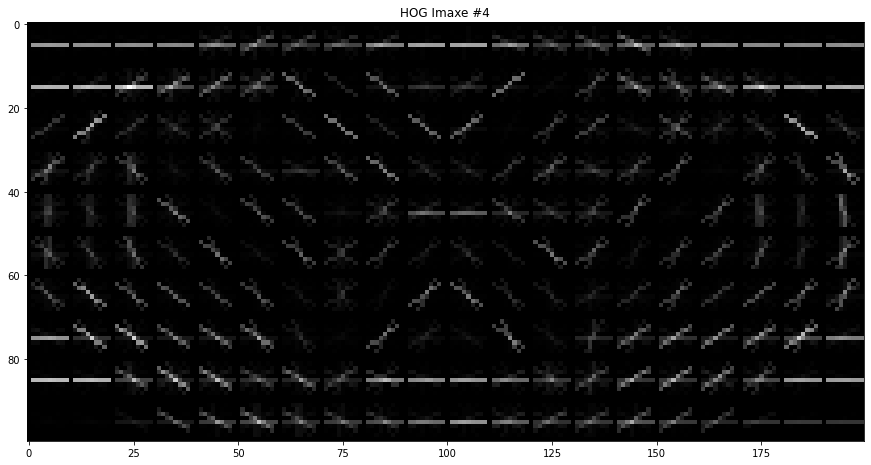

In [ ]:
# Importacions estandar
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['image.cmap'] = 'gray'

#Especificamos os path das imaxes de entrenamento e test
args={"training":"./dataset/car_logos", "test":"./dataset/test_images"}

# Inicializamos as listas de imaes e etiquetas
print("[INFO] extraendo as caracteristicas...")
data = []
labels = []

# lazo sobre todas as imaxes de entrenamento
for imagePath in paths.list_images(args["training"]):
    # extraemos o fabricante do coche a partir no nome da imaxe
    make = imagePath.split("/")[-2]

    # cargamos a imaxe, pasamola a gris e extraemos os contornos
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = imutils.auto_canny(gray)

    # atopamos os contornos e nos quedamos cos mais longos
    # que presumiblemente eran os do logo do coche
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # extraemos o logo e redimensionamos a un tamanho canonico de ancho e alto
    (x, y, w, h) = cv2.boundingRect(c)
    logo = gray[y:y + h, x:x + w]
    logo = cv2.resize(logo, (200, 100))

    # extraemos o Histogram of Oriented Gradients do logo
    H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

    # actualizamos as listas de caracteristicas e etiquetas
    data.append(H)
    labels.append(make)

# entrenamos un clasificados de k_nn (nearest neighbors)
print("[INFO] entrenando o clasificador...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(data, labels)
print("[INFO] evaluando...")

# Lazo sobre as imaxes test
for (i, imagePath) in enumerate(paths.list_images(args["test"])):
    # cargamos a imaxe, pasamola a gris e a redimensionamos ao tamanho canonico
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    logo = cv2.resize(gray, (200, 100))

    # extraemos o Histogram of Oriented Gradients da imaxe test e
    #predecimos o fabricante
    (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True)
    pred = model.predict(H.reshape(1, -1))[0]

    # Visualizamos a imaxe HOG
    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    plt.figure(figsize=[15,15])
    plt.imshow(hogImage);plt.title("HOG Imaxe #{}".format(i + 1));

    # Escrimimos a predicion e a visualizamos
    cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 255, 0), 3)
    # visualizamos os resutlados
    plt.figure(figsize=[15,15])
    plt.imshow(image[:,:,::-1]);plt.title("Test Imaxe #{}".format(i + 1));

## <font style="color:rgb(50,120,229)">Suxestións ao usar o descriptores HOG:</font>

Os descritores HOG son moi potentes; con todo, pode ser tedioso escoller os parámetros correctos para o número de
orientacións, píxeles_por_célula e celas_por_bloque, especialmente cando comeza a traballar coa clasificación de obxectos.

Como punto de partida, aconsello usar orientacións=9, píxeles_por_célula=(4, 4) e celas_por_bloque=(2, 2) como punto de partida. É pouco probable que o teu primeiro conxunto de parámetros produza o mellor rendemento; non obstante, é importante comezar nalgún punto e obter unha liña de base: os resultados pódense mellorar a través do axuste de parámetros.

Tamén é importante cambiar o tamaño da imaxe a un tamaño razoable. Se a rexión de entrada é de 32 x 32 píxeles, a dimensionalidade resultante sería de 1.764-D. Pero se a rexión de entrada é de 128 x 128 píxeles e usaches de novo os parámetros anteriores, o teu vector de características sería 34.596-D. Ao usar grandes rexións de imaxe e non prestar atención aos seus parámetros HOG, pode acabar con vectores de características extremadamente grandes.


## <font style="color:rgb(50,120,229)">Pros e contras de HoG</font>


Pros:

- Descriptor moi potente.
- Excelente para representar o aspecto local.
- Moi útil para representar obxectos estuturalmente e que non presenten variacións substanciais na forma (por exemplo, edificios, persoas que camiñan pola rúa, bicicletas apoiadas nunha parede).
- Moi preciso para a clasificación de obxectos.

Contras:

- Pode dar lugar a vectores de características moi grandes, o que leva a grandes custos de almacenamento e comparacións computacionalmente caras de vectores de características.
- A miúdo non é trivial afinar os parámetros: orientacións, píxeles_por_célula e celas_por_bloque.